This file takes the input of a 15 year MODIS time series containing NPP, and 2 regridded CESM file ranges, then then outputs a
plot of the averages, and another plot containing the anomalies of 2 CESM files - the MODIS timeseries

In [1]:
#import statements
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
from matplotlib import colorbar

import cmocean
import cartopy.util as util
import cartopy.crs as ccrs
import cartopy.crs as ccrs
import cartopy.feature as cfeature  # features such as the ocean, coastlines rivers, etc

#import os #Double check in a bit for the timeseries, average file

mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['savefig.dpi'] = 200
mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'

In [3]:
#Open the average of the Timeseries for the NPP MODIS data for a range of 15 years
average = xr.open_dataset('/glade/work/vgarza/regridAttempt/MODIS_annNPP_3methodmean_2003-2017_9km-AverageV2.nc')

In [4]:
average

<xarray.Dataset>
Dimensions:  (lat: 116, lon: 100, time: 1)
Coordinates:
  * time     (time) float32 9.969e+36
  * lat      (lat) float32 -89.22 -87.67 -86.12 -84.57 ... 86.12 87.67 89.22
  * lon      (lon) float32 0.0 3.6 7.2 10.8 14.4 ... 345.6 349.2 352.8 356.4
Data variables:
    value    (time, lat, lon) float32 ...

# Plotting the average for all of the case files + timeseries file

### Opening and formatting New Dust files

In [5]:
#opens the first 10 years of the regridded CESM files for the new dust case
newDust =  xr.open_mfdataset('/glade/work/vgarza/regridAttempt/regridNewDustFiles/regridded_NewDustFile_0*'+'.nc',)

In [6]:
newDust

<xarray.Dataset>
Dimensions:          (bnds: 2, lat: 116, lon: 100, time: 1560)
Coordinates:
  * time             (time) object 0001-02-01 00:00:00 ... 0131-01-01 00:00:00
  * lon              (lon) float64 0.0 3.6 7.2 10.8 ... 345.6 349.2 352.8 356.4
  * lat              (lat) float64 -89.22 -87.67 -86.12 ... 86.12 87.67 89.22
Dimensions without coordinates: bnds
Data variables:
    time_bnds        (time, bnds) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    photoC_TOT_zint  (time, lat, lon) float32 dask.array<chunksize=(1, 116, 100), meta=np.ndarray>
Attributes:
    CDI:               Climate Data Interface version 1.9.9 (https://mpimet.m...
    Conventions:       CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-cu...
    source:            CCSM POP2, the CCSM Ocean Component
    title:             CESM2.1.3_CAM4_POPECO_CLM4_RTM_CICE5_SGLC_T31_g37_ciso...
    history:           Tue Oct 19 10:58:07 2021: cdo remapbil,r100x116 -selna...
    time_period_freq:  month_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    contents:          Diagnostic and Prognostic Variables
    revision:          $Id$
    calendar:          All years have exactly  365 days.
    start_time:        This dataset was created on 2021-06-30 at 18:51:11.4
    cell_methods:      cell_methods = time: mean ==> the variable values are ...
    CDO:               Climate Data Operators version 1.9.9 (https://mpimet.m...

In [7]:
#grab the NPP ('photoC_TOT_zint') for the new dust case
nppND = newDust['photoC_TOT_zint']

In [8]:
nppND

<xarray.DataArray 'photoC_TOT_zint' (time: 1560, lat: 116, lon: 100)>
dask.array<concatenate, shape=(1560, 116, 100), dtype=float32, chunksize=(1, 116, 100), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0001-02-01 00:00:00 ... 0131-01-01 00:00:00
  * lon      (lon) float64 0.0 3.6 7.2 10.8 14.4 ... 345.6 349.2 352.8 356.4
  * lat      (lat) float64 -89.22 -87.67 -86.12 -84.57 ... 86.12 87.67 89.22
Attributes:
    long_name:     Total C Fixation Vertical Integral
    units:         mmol/m^3 cm/s
    grid_loc:      2110
    cell_methods:  time: mean

In [9]:
#create the mean of the new dust's npp through time
nppMeanND = nppND.mean(axis=0)

### Opening and formatting Old Dust files

In [10]:
#opens the first 10 years of the regridded CESM files for the old dust case
oldDust = xr.open_mfdataset('/glade/work/vgarza/regridAttempt/regridOldDustFiles/regridded_OldDustFile_0*'+'.nc')

In [11]:
#grab the NPP ('photoC_TOT_zint') for the old dust case
nppOD = oldDust['photoC_TOT_zint']

In [12]:
#create the mean of the old dust's npp through time
nppMeanOD = nppOD.mean(axis=0)

In [13]:
nppMeanOD

<xarray.DataArray 'photoC_TOT_zint' (lat: 116, lon: 100)>
dask.array<mean_agg-aggregate, shape=(116, 100), dtype=float32, chunksize=(116, 100), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 0.0 3.6 7.2 10.8 14.4 ... 345.6 349.2 352.8 356.4
  * lat      (lat) float64 -89.22 -87.67 -86.12 -84.57 ... 86.12 87.67 89.22

### Plotting the new dust files, old dust files, and climatolagy files

Starting climatology


/glade/work/vgarza/my_npl_clone1/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


Finished climatology, going to new Dust


/glade/work/vgarza/my_npl_clone1/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/work/vgarza/my_npl_clone1/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/work/vgarza/my_npl_clone1/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


Finished new dust, going to old dust


/glade/work/vgarza/my_npl_clone1/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/work/vgarza/my_npl_clone1/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/work/vgarza/my_npl_clone1/lib/python3.7/site-packages/ipykernel_launcher.py:57: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


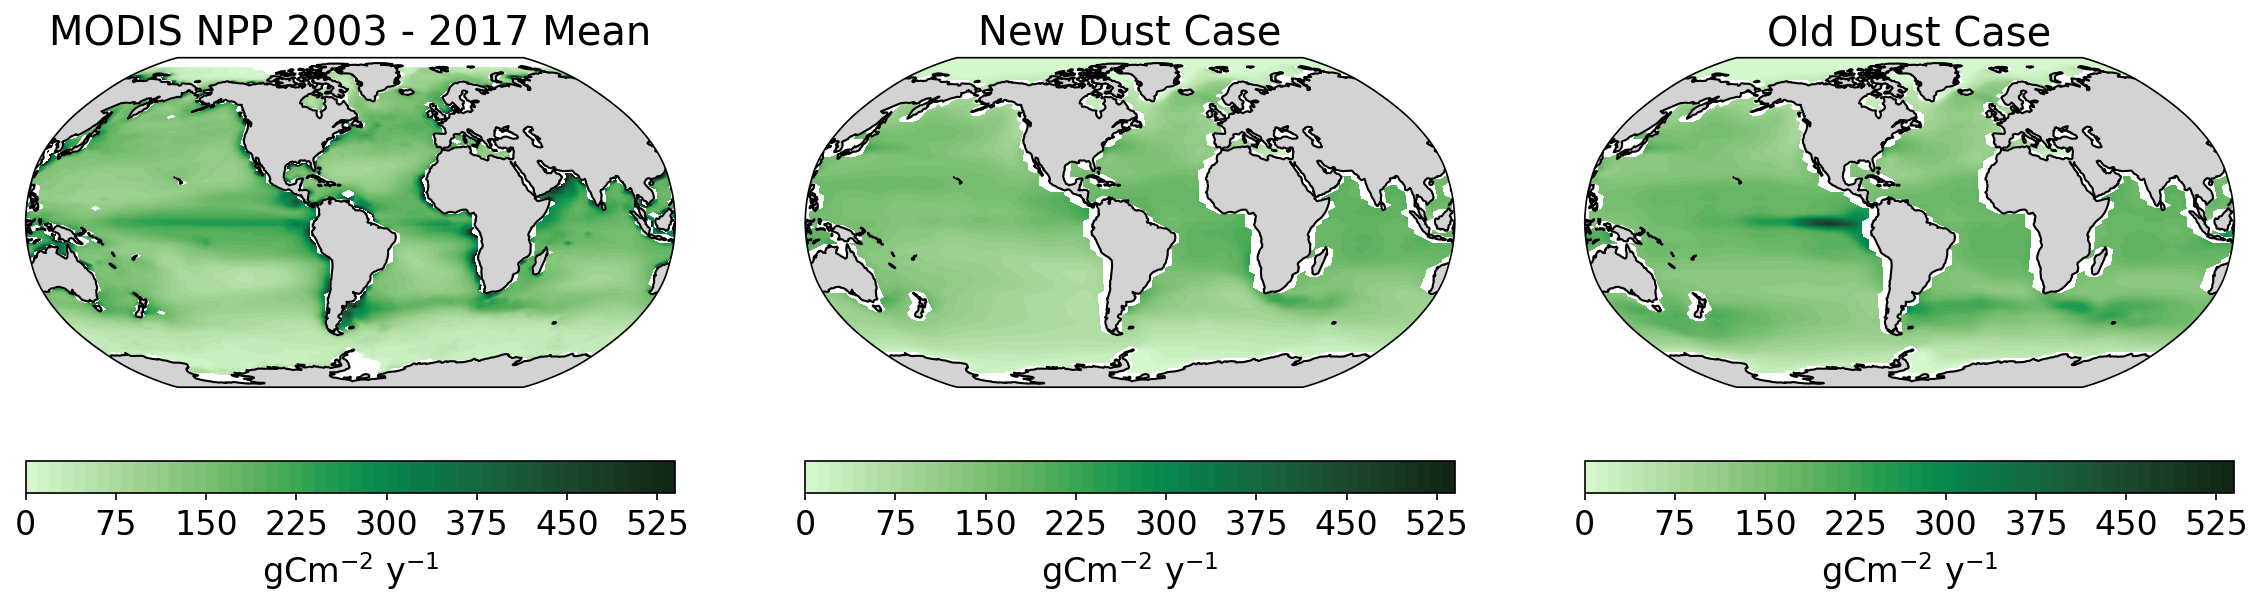

In [20]:
#Create a figure containing 3 subplots
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize =(19,13),
                               subplot_kw=dict(projection=ccrs.Robinson(central_longitude=-60)))


step = np.arange(0,550,10) # Set the min and max for the countour range, as well as the sensitivity
ticks = np.arange(0,550,75) # sets what numbers will be shown on the colorbar
cmap = cmocean.cm.algae #gets the colormap from the cmocean package


#Plotting the MODIS Timeseries in ax1 (subplot 1)

#establish a few parameters 
ax1.set_global() #format the data to take over the whole figure section
ax1.add_feature(cfeature.LAND, color = 'lightgray') # add the land feature to the plot as a light gray color
ax1.add_feature(cfeature.COASTLINE) # add the black coastline around the land


y =  average.lat

#format the data to remove the seem from the seam from the middle of the plot
averageData,x = util.add_cyclic_point(average.value[0], coord=average.lon)

#plot the data
p = ax1.contourf(x, y,averageData,cmap=cmap,transform=ccrs.PlateCarree(), zorder=-1,levels = step,extend='neither')#,zorder=1,alpha=1)

#add a colorbar and set a label with the units
cbar = plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,ax=ax1,extend='neither',ticks=ticks)#, vmin = 0, vmax = 10000)     
cbar.set_label('gCm$^{-2}$ y$^{-1}$', size = 16)

#Set a title
ax1.set_title('MODIS NPP 2003 - 2017 Mean')

#Plotting the data for the New Dust Case

#establish a few parameters 
ax2.set_global() #format the data to take over the whole figure section
ax2.add_feature(cfeature.LAND, color = 'lightgray') # add the land feature to the plot as a light gray color
ax2.add_feature(cfeature.COASTLINE) # add the black coastline around the land

y =  newDust.lat

#format the data to remove the seem from the seam from the middle of the plot
nData,x = util.add_cyclic_point(nppMeanND, coord=newDust.lon)

#Converting the units of the data to match those from the MODIS timeseries data
nData=nData*12*0.001*86400*365*0.01

#plot the data
p = ax2.contourf(x, y,nData, cmap=cmap,
                 transform=ccrs.PlateCarree(), zorder=-1,
                 levels = step,extend='neither')

#add a colorbar and set a label with the units
cbar = plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,ax=ax2,extend='neither',ticks=ticks)#, vmin = 0, vmax = 10000)     
cbar.set_label('gCm$^{-2}$ y$^{-1}$', size = 16)

#Set a title
ax2.set_title('New Dust Case')

#Plotting the data for the New Dust Case

ax3.set_global() #format the data to take over the whole figure section
ax3.add_feature(cfeature.LAND, color = 'lightgray') # add the land feature to the plot as a light gray color
ax3.add_feature(cfeature.COASTLINE) # add the black coastline around the land

y =  oldDust.lat

#format the data to remove the seem from the seam from the middle of the plot
oData,x = util.add_cyclic_point(nppMeanOD, coord=oldDust.lon)
#Converting the units of the data to match those from the MODIS timeseries data
oData=oData*12*0.001*86400*365*0.01

#plot the data
p = ax3.contourf(x, y,oData, cmap=cmap,
                 transform=ccrs.PlateCarree(), zorder=-1,
                 levels = step,extend='neither')#, vmin = 0, vmax = .20)#,zorder=1,alpha=1)

#add a colorbar and set a label with the units
cbar = plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,ax=ax3,extend='neither',ticks=ticks)#, vmin = 0, vmax = 10000)     
cbar.set_label('gCm$^{-2}$ y$^{-1}$', size = 16)

#Set a title
ax3.set_title('Old Dust Case')



plt.show()

Starting climatology
Finished climatology, going to new Dust


/glade/work/vgarza/my_npl_clone1/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/work/vgarza/my_npl_clone1/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Finished new dust, going to old dust


/glade/work/vgarza/my_npl_clone1/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/work/vgarza/my_npl_clone1/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


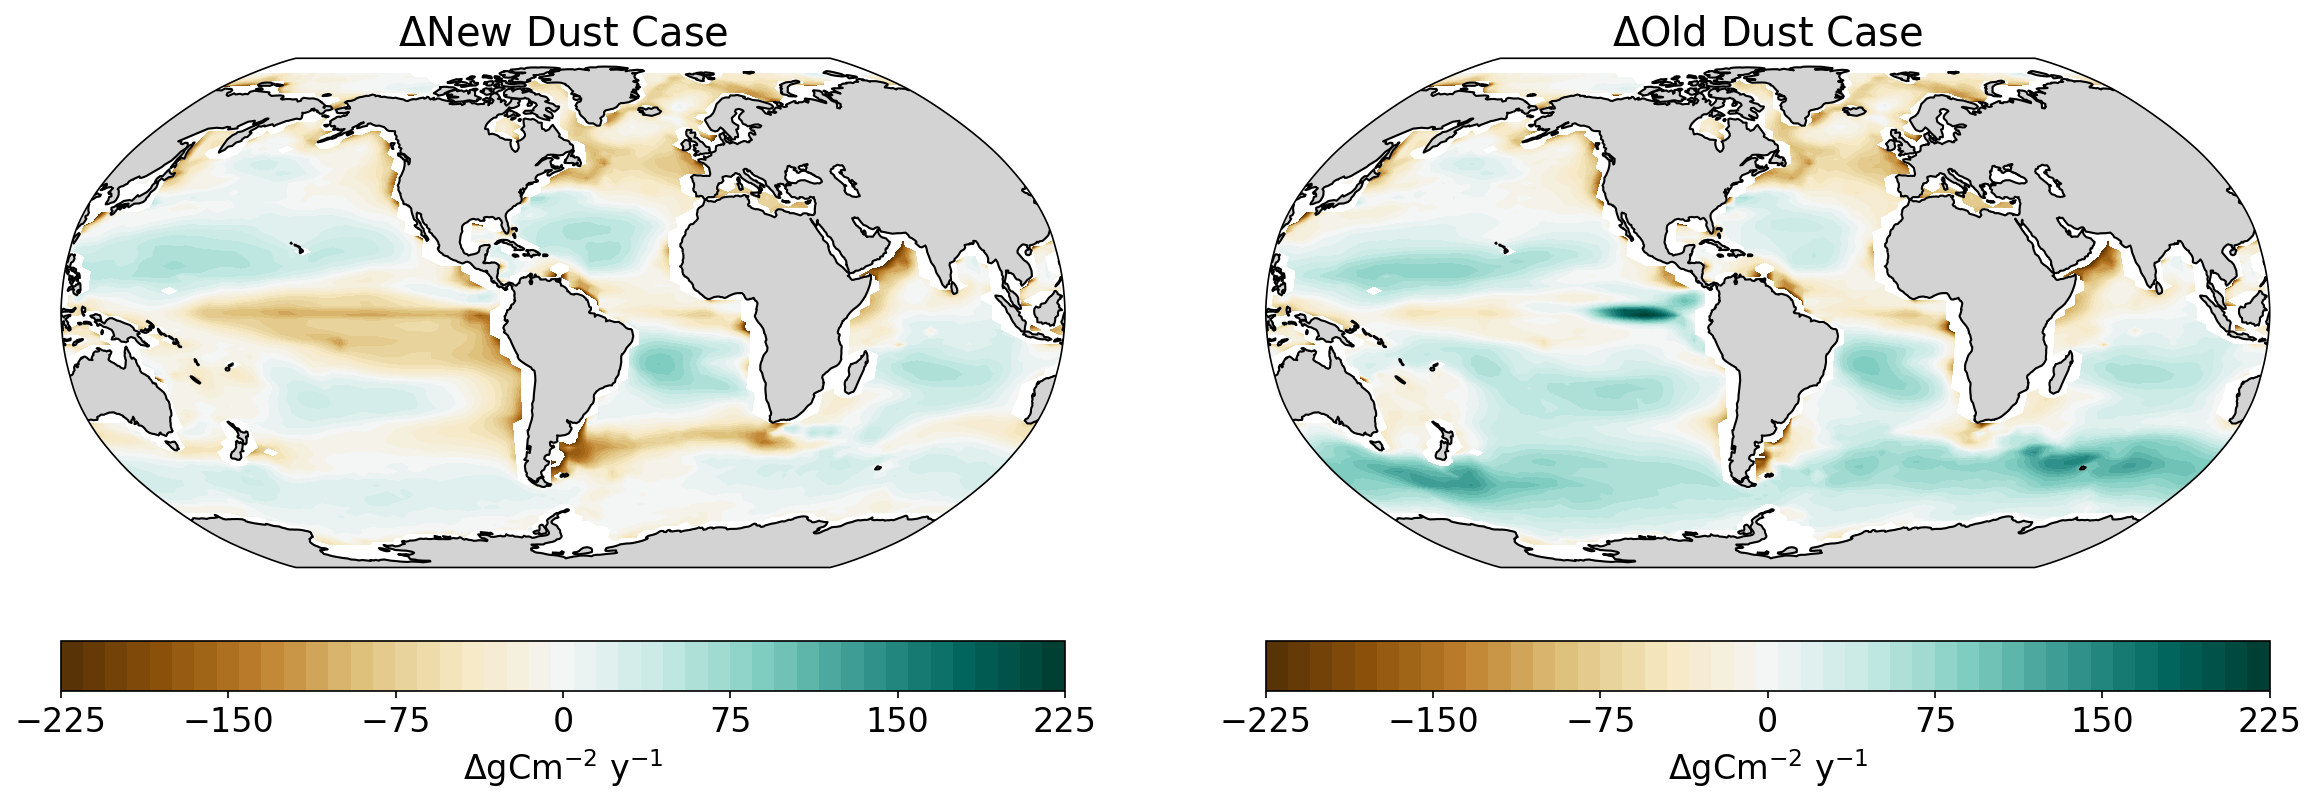

In [21]:
#Create a figure containing 2 subplots
fig, (ax2, ax3) = plt.subplots(1, 2,figsize =(19,13),
                               subplot_kw=dict(projection=ccrs.Robinson(central_longitude=-60)))


step = np.arange(-225,230,10) # Set the min and max for the countour range, as well as the sensitivity
ticks = np.arange(-225,230,75) # sets what numbers will be shown on the colorbar
cmap = plt.cm.get_cmap('BrBG') #gets the colormap from the cmocean package

#Prepping the data for the timeseries data
averageData,x = util.add_cyclic_point(average.value[0], coord=average.lon)


#Plotting the data for the New Dust Case

#establish a few parameters 
ax2.set_global() #format the data to take over the whole figure section
ax2.add_feature(cfeature.LAND, color = 'lightgray') # add the land feature to the plot as a light gray color
ax2.add_feature(cfeature.COASTLINE) # add the black coastline around the land


y =  newDust.lat

#format the new dust data to remove the seem from the seam from the middle of the plot
nData,x = util.add_cyclic_point(nppMeanND, coord=newDust.lon)

#Converting the units of the data to match those from the MODIS timeseries data
nData=nData*12*0.001*86400*365*0.01

#taking the anomaly, by subtracting the CESM data - observed data
anomalyND=nData-averageData

#plot the data
p = ax2.contourf(x, y,anomalyND, cmap=cmap,
                 transform=ccrs.PlateCarree(), zorder=-1,
                 levels = step,extend='neither')#, vmin = 0, vmax = .20)#,zorder=1,alpha=1)


#add a colorbar and set a label with the units
cbar = plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,ax=ax2,ticks=ticks)#, vmin = 0, vmax = 10000)     
cbar.set_label('$\Delta$gCm$^{-2}$ y$^{-1}$', size = 16)

#setting a title
ax2.set_title('$\Delta$New Dust Case')



#Plotting the data for the New Dust Case
ax3.set_global() #format the data to take over the whole figure section
ax3.add_feature(cfeature.LAND, color = 'lightgray') # add the land feature to the plot as a light gray color
ax3.add_feature(cfeature.COASTLINE) # add the black coastline around the land


y =  oldDust.lat

#format the new dust data to remove the seem from the seam from the middle of the plot
oData,x = util.add_cyclic_point(nppMeanOD, coord=oldDust.lon)
#Converting the units of the data to match those from the MODIS timeseries data
oData=oData*12*0.001*86400*365*0.01

#taking the anomaly, by subtracting the CESM data - observed data
anomalyOD=oData-averageData

#plot the data
p = ax3.contourf(x, y,anomalyOD, cmap=cmap,
                 transform=ccrs.PlateCarree(), zorder=-1,
                 levels = step,extend='neither')#, vmin = 0, vmax = .20)#,zorder=1,alpha=1)

#add a colorbar and set a label with the units
cbar = plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,ax=ax3,ticks=ticks)#, vmin = 0, vmax = 10000)     
cbar.set_label('$\Delta$gCm$^{-2}$ y$^{-1}$', size = 16)

#Set title
ax3.set_title('$\Delta$Old Dust Case')


plt.show()
    